In [8]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
import os
import requests
import time
from tqdm import tqdm

In [2]:
class Book(object):
    def __init__(self):
        self.link = ''
        self.book_name = ''

In [4]:
driver = webdriver.Remote(
    command_executor='http://172.17.0.2:4444/wd/hub', 
    desired_capabilities=DesiredCapabilities.CHROME
)
url = 'https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=python+programming'
driver.get(url)
soup = BeautifulSoup(driver.page_source, 'lxml')

In [4]:
for i in soup.find('div', {'id': 'resultsCol'}).find_all('li'):
    try: 
        link = i.find('a', class_='a-link-normal a-text-normal')['href']
        if 'https://www.amazon.com/' not in link:
            link = 'https://www.amazon.com' + link
        print(link)
    except:
        pass
    print('\n')

https://www.amazon.com/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A01734711SISCN5HWQ9ML&url=https%3A%2F%2Fwww.amazon.com%2FTkinter-GUI-Programming-Example-real-world%2Fdp%2F1788627482%2Fref%3Dsr_1_1_sspa%2F143-1254981-0078628%3Fie%3DUTF8%26qid%3D1536041717%26sr%3D8-1-spons%26keywords%3Dpython%2Bprogramming%26psc%3D1&qualifier=1536041717&id=727915915760896&widgetName=sp_atf


https://www.amazon.com/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_2?ie=UTF8&adId=A03675841MSJ9NTZGX5LM&url=https%3A%2F%2Fwww.amazon.com%2FDjango-Example-powerful-reliable-applications%2Fdp%2F1788472489%2Fref%3Dsr_1_2_sspa%2F143-1254981-0078628%3Fie%3DUTF8%26qid%3D1536041717%26sr%3D8-2-spons%26keywords%3Dpython%2Bprogramming%26psc%3D1&qualifier=1536041717&id=727915915760896&widgetName=sp_atf


https://www.amazon.com/Python-Crash-Course-Hands-Project-Based/dp/1593276036/ref=sr_1_3/143-1254981-0078628?ie=UTF8&qid=1536041717&sr=8-3&keywords=python+programming


https://w

In [15]:
book_link = 'https://www.amazon.com/Smarter-Way-Learn-Python-Remember-ebook/dp/B077Z55G3B/ref=sr_1_4/146-5092506-0620052?ie=UTF8&qid=1536047593&sr=8-4&keywords=python+programming'
driver.get(book_link)
tmp = BeautifulSoup(driver.page_source, 'lxml')

In [16]:
tmp.find('h1', {'id': 'title'}).findNext().text

'A Smarter Way to Learn Python: Learn it faster. Remember it longer.'

In [57]:
# isbn = 
tmp.find('div', class_='content').find_all('li')[3].text.replace('ISBN-10: ', '')

'1788627482'

In [77]:
driver.switch_to_frame(driver.find_element_by_id('bookDesc_iframe'))
tmp2 = BeautifulSoup(driver.page_source, 'lxml')

In [102]:
description = ''
for i in tmp2.find_all('h4'):
    
    title = '-'*5 + i.text + '-'*5
    content = i.findNext().text
    description = description + title + '\n' + content + '\n\n'
print(description)

-----Key Features-----
The fundamentals of Python and GUI programming with Tkinter.Create multiple cross-platform projects by integrating a host of third-party libraries and tools.Build beautiful and highly-interactive user interfaces that target multiple devices.

-----Book Description-----
Tkinter is a modular, cross-platform application development toolkit for Python. When developing GUI-rich applications, the most important choices are which programming language(s) and which GUI framework to use. Python and Tkinter prove to be a great combination. This book will get you familiar with Tkinter by having you create fun and interactive projects. These projects have varying degrees of complexity. We'll start with a simple project, where you'll learn the fundamentals of GUI programming and the basics of working with a Tkinter application. After getting the basics right, we'll move on to creating a project of slightly increased complexity, such as a highly customizable Python editor. In t

In [1]:
from get_amazon_book_info import *

In [2]:
url = 'https://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=python+programming'
bookList = get_book_list(url)

In [4]:
# for b in bookList:
#     print(b.link)
#     print('\n')
bookList = get_book_details(bookList[:10])


100%|██████████| 10/10 [01:32<00:00,  9.23s/it]


In [7]:
for b in bookList:
    print(b.book_name)
    print(b.isbn)
    print(b.description)
    print(b.link)
    print('\n\n\n')

Tkinter GUI Programming by Example: Learn to create modern GUIs using Tkinter by building real-world projects in Python
1788627482
-----Key Features-----
The fundamentals of Python and GUI programming with Tkinter.Create multiple cross-platform projects by integrating a host of third-party libraries and tools.Build beautiful and highly-interactive user interfaces that target multiple devices.

-----Book Description-----
Tkinter is a modular, cross-platform application development toolkit for Python. When developing GUI-rich applications, the most important choices are which programming language(s) and which GUI framework to use. Python and Tkinter prove to be a great combination. This book will get you familiar with Tkinter by having you create fun and interactive projects. These projects have varying degrees of complexity. We'll start with a simple project, where you'll learn the fundamentals of GUI programming and the basics of working with a Tkinter application. After getting the ba

In [3]:
bookList[1].link

'https://www.amazon.com/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_2?ie=UTF8&adId=A03675841MSJ9NTZGX5LM&url=https%3A%2F%2Fwww.amazon.com%2FDjango-Example-powerful-reliable-applications%2Fdp%2F1788472489%2Fref%3Dsr_1_2_sspa%2F142-8423873-6115827%3Fie%3DUTF8%26qid%3D1536048455%26sr%3D8-2-spons%26keywords%3Dpython%2Bprogramming%26psc%3D1&qualifier=1536048454&id=3799846154943245&widgetName=sp_atf'

In [55]:
driver = webdriver.Remote(
    command_executor='http://172.17.0.2:4444/wd/hub', 
    desired_capabilities=DesiredCapabilities.CHROME
)
driver.get('https://www.amazon.com/Python-Crash-Course-Hands-Project-Based/dp/1593276036/ref=sr_1_3/142-6141922-4291643?ie=UTF8&qid=1536049309&sr=8-3&keywords=python+programming')
soup = BeautifulSoup(driver.page_source.encode('utf-8'), 'lxml')

<!DOCTYPE html>
<html class=" a-js a-audio a-video a-canvas a-svg a-drag-drop a-geolocation a-history a-webworker a-autofocus a-input-placeholder a-textarea-placeholder a-local-storage a-gradients a-transform3d -scrolling a-text-shadow a-text-stroke a-box-shadow a-border-radius a-border-image a-opacity a-transform a-transition" data-19ax5a9jf="dingo" data-aui-build-date="3.18.12-2018-08-29" lang="en-us" xmlns="http://www.w3.org/1999/xhtml"><!-- sp:feature:head-start --><head><script async="" crossorigin="anonymous" src="https://m.media-amazon.com/images/G/01/csm/showads.v2.js"></script><script async="" crossorigin="anonymous" src="https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/ClientSideMetricsAUIJavascript-06a0879f82a6ea3332109c3d7634b885a06ac744._V2_.js"></script><style class="vjs-styles-defaults">
      .video-js {
        width: 300px;
        height: 150px;
      }

      .vjs-fluid {
        padding-top: 56.25%
      }
    </style><script>var aPageStart = (new Dat
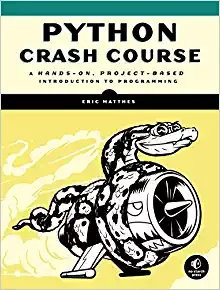

In [60]:
soup

In [56]:
soup.find(id=re.compile('id="iframeContent"')).findChildren()

AttributeError: 'NoneType' object has no attribute 'findChildren'

In [43]:
import re
BeautifulSoup(soup.find(string=re.compile('id="iframeContent"')), 'html.parser')


P.register("DynamicIframe", function(){

function DynamicIframe(options) {
  
  var nTries = 0,
      MAX_TRIES = 20,
      iframeId = options.iframeId,
      encodedIframeContent = options.encodedIframeContent,
      iframeWrapperId = options.iframeWrapperId,
      initialResizeCallback = options.initialResizeCallback,
      iframeCSSId = "dynamic_iframe_CSS";
      iframeOverriddenCSSId = options.overriddenCSSId;
    
  this.createIframe = function() {
    var iframe = document.createElement('iframe');
    iframe.id = iframeId;
    iframe.className = "ap_never_hide";
    iframe.width = "100%";
    iframe.scrolling = "no";
    iframe.frameBorder = "0";
    onloadFn = this.iframeload;
    
    if ( iframe.addEventListener )
      iframe.addEventListener("load", onloadFn, false);
    else if ( iframe.attachEvent )
      iframe.attachEvent("onload", onloadFn);
    else iframe.onload = onloadFn;
    
    var wrapper = document.getElementById(iframeWrapperId);
    wrapper.innerHTML = '';


In [9]:
soup.find('iframe', {'id': 'bookDesc_iframe'})

<iframe class="ap_never_hide" frameborder="0" id="bookDesc_iframe" scrolling="no" style="height: 590px;" width="100%"></iframe>

In [11]:
soup.find('div', {'id': 'iframeContent'})

In [14]:
driver.switch_to_frame(driver.find_element_by_id('bookDesc_iframe'))
tmp2 = BeautifulSoup(driver.page_source, 'lxml')
description = ''
for i in tmp2.find_all('h4'):
    title = '-'*5 + i.text + '-'*5
    content = i.findNext().text
    description = description + title + '\n' + content + '\n\n'

In [15]:
description

''

In [16]:
driver.get(bookList[1].link)
driver.switch_to_frame(driver.find_element_by_id('bookDesc_iframe'))
tmp2 = BeautifulSoup(driver.page_source, 'lxml')

In [17]:
description = ''
for i in tmp2.find_all('h4'):
    title = '-'*5 + i.text + '-'*5
    content = i.findNext().text
    description = description + title + '\n' + content + '\n\n'

In [33]:
des = ''
for i in tmp2.find('div', {'id': 'iframeContent'}).findChildren():
    des = des + i.text + '\n'
print(des)

Learn Django with four end-to-end projects

Learn Django by building real-world web applications from scratchDevelop powerful web applications quickly using the best coding practicesIntegrate other technologies into your application with clear, step-by-step explanations and comprehensive example code
Learn Django by building real-world web applications from scratch
Develop powerful web applications quickly using the best coding practices
Integrate other technologies into your application with clear, step-by-step explanations and comprehensive example code


Build practical real-world web applications with DjangoUse Django with other technologies such as Redis and CeleryDevelop pluggable Django applicationsCreate advanced features, optimize your code and use the cache frameworkAdd internationalization to your Django projectsEnhance the user experience using JavaScript and AJAXAdd social features to your projectsBuild RESTful APIs for your applications
Build practical real-world web appl

In [27]:
bookList[0].link

'https://www.amazon.com/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A01734711SISCN5HWQ9ML&url=https%3A%2F%2Fwww.amazon.com%2FTkinter-GUI-Programming-Example-real-world%2Fdp%2F1788627482%2Fref%3Dsr_1_1_sspa%2F142-8423873-6115827%3Fie%3DUTF8%26qid%3D1536048455%26sr%3D8-1-spons%26keywords%3Dpython%2Bprogramming%26psc%3D1&qualifier=1536048454&id=3799846154943245&widgetName=sp_atf'

In [31]:
a = ''

if a == '':
    print('this is empty')

this is empty
